# 1. Импорт библиотек и загрузка данных

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

Краткая информация о каждом из стобцов датасета:

* PassengerId: Уникальный индекс/номер строки. Начинается с 1 (для первой строки) и увеличивается на 1 для каждой следующей. Рассматриваем его как индентификатор строки и, что логично, идентификатор пассжира (т.к. для каждого пассажира в датасете представлена только одна строка).
* Survived: Признак, показывающий был ли спасен данный пассажир или нет. 1 означает, что удалось выжить, и 0 - не удалось спастись.
* Pclass: Класс билета. 1 - означает Первый класс билета. 2 - означает Второй класс билета. 3 - означает Третий класс билета.
* Name: Имя пассажира. Имя также может содержать титулы и обращения. "Mr" для мужчин. "Mrs" для женщин. "Miss" для девушек (тут имеется в виду что для тех, кто не замужем, так было принято, да и сейчас тоже, говорить в западном обществе). "Master" для юношей.
* Sex: Пол пассажира. Либо мужчины (=Male) оибо женщины (=Female).
* Age: Возраст пассажира. "NaN" значения в этой колонке означают, что возраст данного пассажира отсутствует/неизвестен/или не был записанv в датасет.
* SibSp: Количество братьев/сестер или супругов, путешествующих с каждым пассажиром.
* Parch: Количество родителей детей (Number of parents of children travelling with each passenger).
* Ticket: Номер билета.
* Fare: Сумма, которую заплатил пассажир за путешествие.
* Cabin: Номер каюты пассажира. "NaN" значения в этой колонке указавает на то, что номер каюты данного пассажира не был записан.
* Embarked: Порт отправления данного пассажира

## Загрузка данных

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

display(df_train.head())
display(df_test.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Смотрим пропуски

In [3]:
pd.DataFrame(data = [df_train.isna().sum()/df_train.shape[0]*100, df_test.isna().sum()/df_test.shape[0]*100], index=["Train Null (%)", "Test Null (%)"]).T.style.background_gradient(cmap='summer_r')

,Train Null (%),Test Null (%)
PassengerId,0.000000,0.000000
Survived,0.000000,nan
Pclass,0.000000,0.000000
Name,0.000000,0.000000
Sex,0.000000,0.000000
Age,19.865320,20.574163
SibSp,0.000000,0.000000
Parch,0.000000,0.000000
Ticket,0.000000,0.000000
Fare,0.000000,0.239234


Возраст и каюта имеют большое количество пропусков. Переменная Embarked в тренировочных данных имеет 2 нулевых значения, а переменная Fare в тестовых данных имеет 1 нулевое значение. Сначала нам нужно будет проанализировать эти данные, чтобы решить, удалить ли этот столбец или выполнить какое-либо изменение.

## Проверяем данные на дубли

In [4]:
print(f"Train data has {df_train.duplicated().sum()} duplicated data")
print(f"Test data has {df_test.duplicated().sum()} duplicated data")

Train data has 0 duplicated data
Test data has 0 duplicated data


No duplicated data in both train and test data. Looks good.

## Смотрим информацию о датасете

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


У нас 12 переменных по 891 записей. Типы переменных:

**Numerical:**
- **Discrete:**
    1. SibSp
    2. Parch
    <br><br>
    
- **Continous:**
    1. Age
    2. Fare
    <br>
    
**Categorical:**
- **Nominal:**
    1. Sex
    2. Embarked
    3. Survived (Target Variable)
    <br><br>
    
- **Ordinal:**
    1. Pclass
    
**Others:**
- **Text**
    1. Ticket
    2. Name
    <br><br>
    
- **ID:**
    1. PassengerId

# 2. Exploratory Data Analysis

Давайте сгруппируем наши типы переменных и создадим две функции для визуализации наших числовых и категориальных данных.

In [6]:
num_var = ["SibSp", "Parch", "Age", "Fare"]
cat_var = ["Sex", "Embarked", "Pclass"]
target = "Survived"

In [7]:
def num_dist(data, var):
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    sns.histplot(data=data, x=var, kde=True, ax=ax[0])
    sns.boxplot(data=data, x=var, ax=ax[1])
    ax[0].set_title(f"{var} Distribution Histogram")
    ax[1].set_title(f"{var} Distribution Boxplot")

    plt.show()
    
def cat_dist(data, var):
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    df_train[var].value_counts().plot(kind="pie", explode=[0.05 for x in data[var].dropna().unique()], autopct='%1.1f%%', ax=ax[0], shadow=True)
    ax[0].set_title(f"{var} Pie Chart")
    ax[0].set_ylabel('')

    count = sns.countplot(x=var, data=df_train, ax=ax[1])
    for bar in count.patches:
        count.annotate(format(bar.get_height()),
            (bar.get_x() + bar.get_width() / 2,
            bar.get_height()), ha='center', va='center',
            size=11, xytext=(0, 8),
            textcoords='offset points')
    ax[1].set_title(f"{var} Bar Chart")
    plt.show()

## Распределение целевой переменной

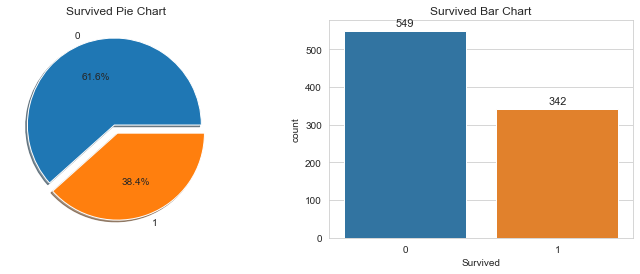

In [8]:
cat_dist(df_train, "Survived")

К сожалению, 61,6% пассажиров не выжили в смертельной аварии. Только 342 пассажира выжили из 891 пассажира в данных обучения. Итак, что заставило их пережить аварию. Мы попытаемся проанализировать функции в этом наборе данных, которые могли бы ответить на этот вопрос.

### Числовые

In [9]:
df_train[num_var].describe()

,SibSp,Parch,Age,Fare
count,891.000000,891.000000,714.000000,891.000000
mean,0.523008,0.381594,29.699118,32.204208
std,1.102743,0.806057,14.526497,49.693429
min,0.000000,0.000000,0.420000,0.000000
25%,0.000000,0.000000,20.125000,7.910400
50%,0.000000,0.000000,28.000000,14.454200
75%,1.000000,0.000000,38.000000,31.000000
max,8.000000,6.000000,80.000000,512.329200


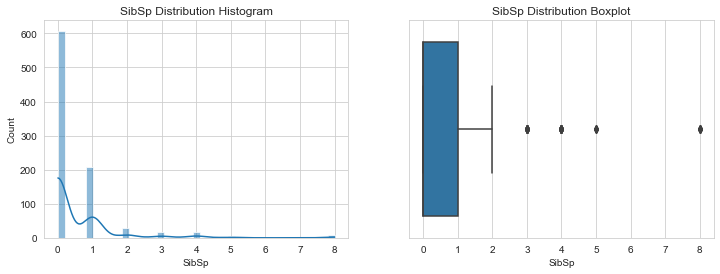

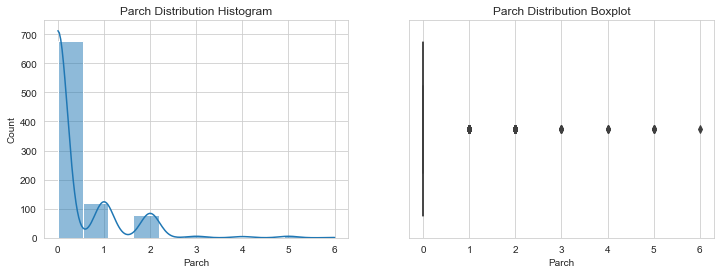

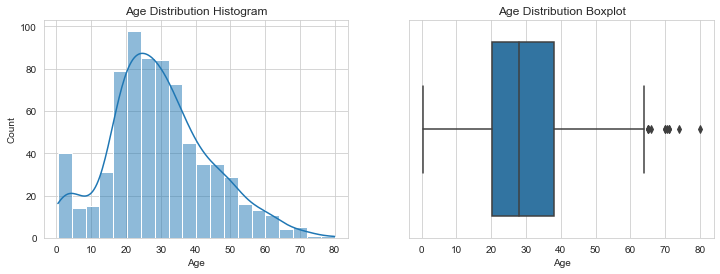

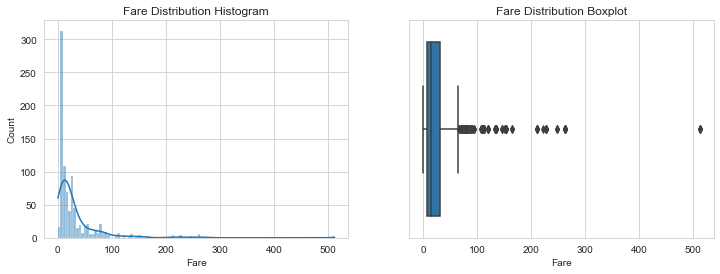

In [10]:
for var in num_var:
    num_dist(df_train, var)

Большинство пассажиров в то время путешествовали в одиночку без своих семей. Возраст пассажиров также варьируется от 0,42 до 80 лет, в среднем 29,7 года. Тарифы для этих пассажиров также различаются, но что интересно, есть пассажиры, которым не нужно платить за этот круиз.

Как мы видим, все вышеперечисленные переменные имеют выбросы. Переменная возраста, по-видимому, имеет почти нормальное распределение, но есть некоторые выбросы, из-за которых распределение смещается вправо. Из-за этого другие переменные, по-видимому, имеют правое асимметричное распределение.

### Категорийные

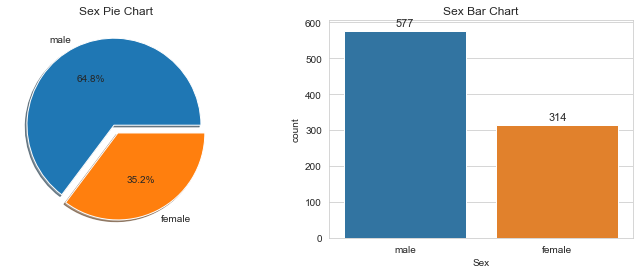

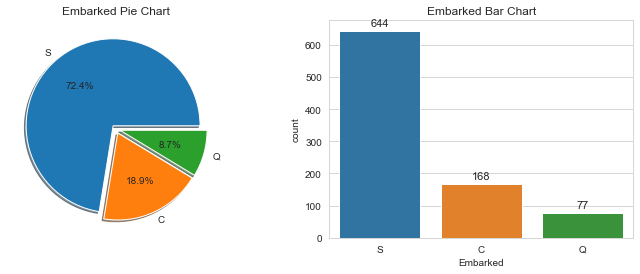

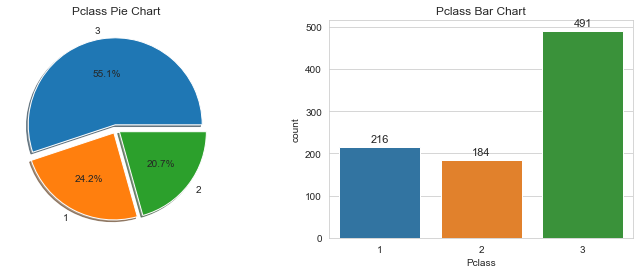

In [11]:
for var in cat_var:
    cat_dist(df_train, var)

64,8% пассажиров в этой обучающей выборке — мужчины, а остальные 35,2% — женщины. Более 70% этих пассажиров высадились из порта S (Саутгемптон). Очень мало пассажиров высадились из порта Q (Квинстаун), что составляет всего 8,7%, а остальные отправились из порта C (Шербур). Большинство пассажиров имеют билеты 3-го класса, а пассажиров 1-го и 2-го класса почти поровну.

## Выжившие против погибших

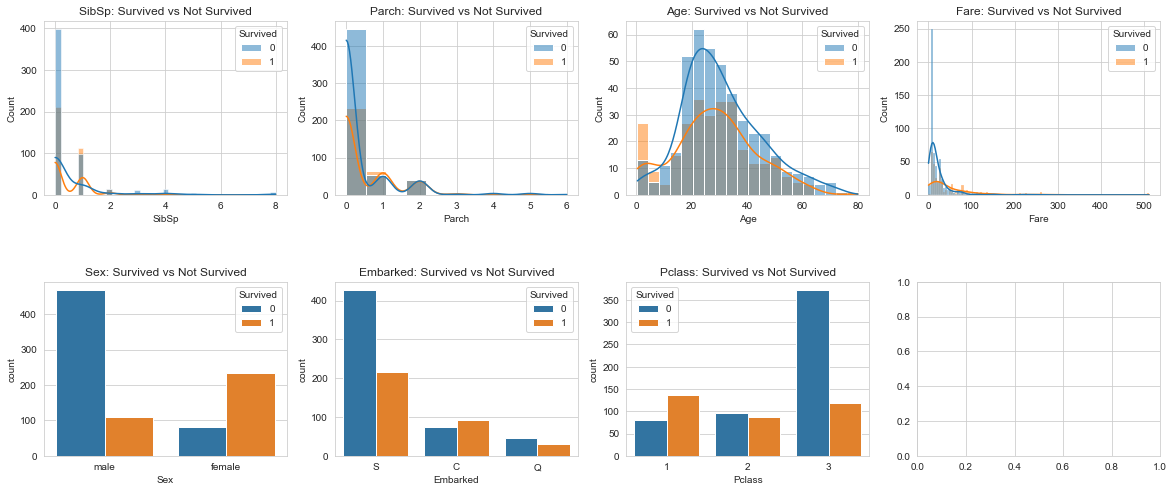

In [12]:
fig, ax = plt.subplots(2, 4, figsize=(20, 8))
ax = ax.flatten()

for i, var in enumerate(num_var+cat_var):
    if i < 4:
        sns.histplot(data=df_train, x=var, hue=target, kde=True, ax=ax[i])
    else:
        sns.countplot(data=df_train, x=var, hue=target, ax=ax[i])
    
    ax[i].set_title(f"{var}: Survived vs Not Survived")
    
plt.subplots_adjust(hspace=0.5)
plt.show()

Судя по всему, у пассажиров, путешествующих с небольшим количеством членов семьи, больше шансов на выживание. Кроме того, в этой трагедии выжило большое количество детей (возраст <= 10 лет), а пассажиры старше их, как правило, не выживают. Мы также можем видеть, что количество выживших женщин было намного больше, чем мужчин (первый код женщин и детей). Пассажирам, высадившимся из порта C, повезло больше, поскольку многие из них выжили. P-класс также играет здесь значительную роль, потому что большинству пассажиров из P-класса 1 удалось выжить или иметь больший приоритет для спасения, в то время как пассажиры с P-классом 3, как правило, не выживают.

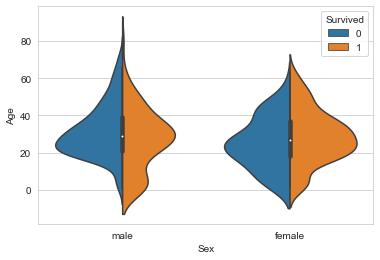

In [13]:
sns.violinplot(data=df_train, x="Sex", y="Age", hue="Survived", split=True)
plt.show()

Показатели выживаемости детей обоих полов кажутся хорошими, хотя коэффициент выживаемости мальчиков выше. Для пожилых людей (возраст > 60 лет) коэффициент выживаемости пожилых мужчин, как правило, ниже, в отличие от коэффициента выживаемости пожилых женщин, который, как правило, выше.

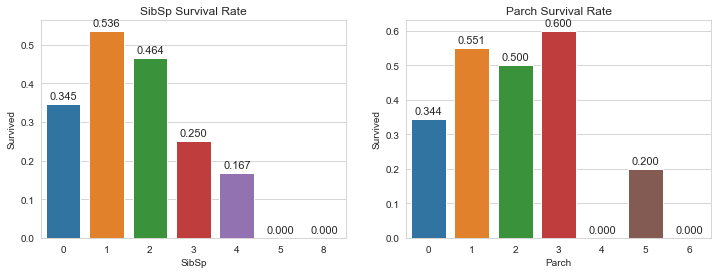

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

for i, var in enumerate(["SibSp", "Parch"]):
    surv = sns.barplot(data=df_train, x=var, y=target, ax=ax[i], ci=None)
    for bar in surv.patches:
        surv.annotate(format("{:.3f}".format(bar.get_height())),
            (bar.get_x() + bar.get_width() / 2,
            bar.get_height()), ha='center', va='center',
            size=11, xytext=(0, 8),
            textcoords='offset points')
        
    ax[i].set_title(f"{var} Survival Rate")

График выше показывает, что пассажиры с небольшим количеством членов семьи, как правило, выживают. Между тем, выжили только ~34% одиноких пассажиров (SibSpb и Parch = 0). К сожалению, выжило 0% пассажиров с SibSp > 4, а пассажиров с Parch > 3 почти не осталось.

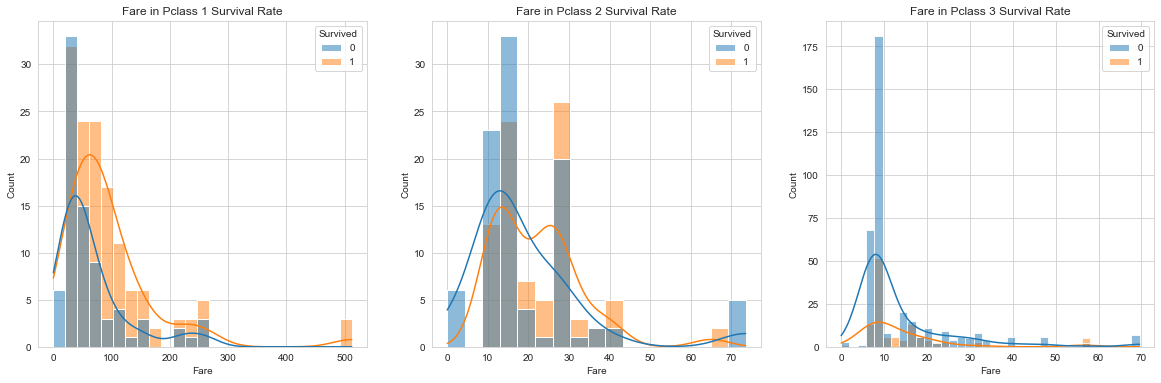

In [15]:
fig, ax = plt.subplots(1, 3, figsize=(20, 6))

for i, pc in enumerate(sorted(df_train["Pclass"].unique())):
    sns.histplot(data=df_train[df_train["Pclass"]==pc], x="Fare", hue=target, kde=True, ax=ax[i])
    ax[i].set_title(f"Fare in Pclass {pc} Survival Rate")

Пассажиры с более высокими тарифами с большей вероятностью выживут в этих авариях, хотя некоторые из пассажиров с самыми высокими тарифами на P-класс 2 не выжили. Несмотря на то, что большинство пассажиров, которые не выжили, были пассажирами P-класса 3, но P-классы 1 и 2 также не гарантировали безопасность пассажиров, особенно для пассажиров с меньшими тарифами.

# 3. Feature Engineering

## PassengerId

In [16]:
df_train["PassengerId"]

0        1
1        2
2        3
3        4
4        5
      ... 
886    887
887    888
888    889
889    890
890    891
Name: PassengerId, Length: 891, dtype: int64

Эта переменная содержит только уникальный идентификационный номер каждого пассажира и не может быть классифицирована, поэтому мы можем просто удалить эту переменную.

In [17]:
df_train.drop("PassengerId", axis=1, inplace=True)
df_test.drop("PassengerId", axis=1, inplace=True)

## Name

In [18]:
df_train["Name"]

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

Как мы видим, в именах пассажиров есть закономерность, которую мы можем извлечь, а именно их титулы (мистер, миссис, мисс и т. д.). Давайте извлечем строковое значение, за которым следует точка (.).

In [19]:
df_train["Title"] = df_train["Name"].str.extract('([A-Za-z]+)\.')
df_test["Title"] = df_test["Name"].str.extract('([A-Za-z]+)\.')

df_train["Title"].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

Некоторые инициалы принадлежат очень небольшому количеству людей, а некоторые инициалы имеют то же значение, что и другие. Мы сгруппируем их в соответствии с соответствующей группой.

In [20]:
def convert_title(title):
    if title in ["Ms", "Mile", "Miss"]:
        return "Miss"
    elif title in ["Mme", "Mrs"]:
        return "Mrs"
    elif title == "Mr":
        return "Mr"
    elif title == "Master":
        return "Master"
    else:
        return "Other"
        
df_train["Title"] = df_train["Title"].map(convert_title)
df_test["Title"] = df_test["Title"].map(convert_title)

df_train["Title"].value_counts()

Mr        517
Miss      183
Mrs       126
Master     40
Other      25
Name: Title, dtype: int64

У нас есть инициалы каждого пассажира, так что теперь имя переменной больше не нужно. Теперь мы можем удалить эту переменную.

In [21]:
df_train.drop("Name", axis=1, inplace=True)
df_test.drop("Name", axis=1, inplace=True)

## Ticket

In [22]:
df_train["Ticket"]

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

Эта переменная также содержит только уникальное значение билета для каждого пассажира, и мы не можем извлечь шаблон. Итак, мы просто удалим эту переменную.

In [23]:
df_train.drop("Ticket", axis=1, inplace=True)
df_test.drop("Ticket", axis=1, inplace=True)

## Cabin

Эта переменная имеет слишком много пропущенных значений как в обучающих, так и в тестовых данных (более 77%), поэтому в этой переменной отсутствует много информации. Мы также удалим эту переменную.

In [24]:
df_train.drop("Cabin", axis=1, inplace=True)
df_test.drop("Cabin", axis=1, inplace=True)

## Age

Переменная возраста имеет отсутствующее значение 19,87% в обучающих данных и 20,57% в тестовых данных. Это число не очень большое, поэтому мы попытаемся выполнить импутацию данных для этой переменной. Итак, как мы собираемся это сделать?

Обычно мы можем просто заполнить пропущенные значения, используя средние или медианные значения. Но проблема в том, что этот набор данных содержит много пассажиров разного возраста. Мы просто не можем назначить 4-летнему ребенку или 60-летнему мужчине средний возраст 29 лет. Во-первых, давайте проверим корреляцию между возрастной переменной с другими переменными.

In [25]:
df_train.corr()["Age"].sort_values(ascending=False)

Age         1.000000
Fare        0.096067
Survived   -0.077221
Parch      -0.189119
SibSp      -0.308247
Pclass     -0.369226
Name: Age, dtype: float64

Их корреляция выглядит не очень хорошо. Теперь давайте попробуем проверить категориальную переменную, которая может классифицировать возраст пассажиров, то есть переменную Title.

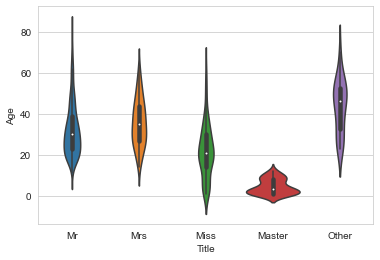

In [26]:
sns.violinplot(data=df_train, x="Title", y="Age")
plt.show()

Это выглядит довольно хорошо. Мы можем использовать переменную Title для классификации возраста пассажиров. Давайте проверим средний возраст пассажира на основе его именования.

In [27]:
df_train.groupby('Title')['Age'].mean()

Title
Master     4.574167
Miss      21.816327
Mr        32.368090
Mrs       35.788991
Other     43.750000
Name: Age, dtype: float64

Заполните отсутствующее значение возраста, используя средний возраст пассажиров для каждого названия.

In [28]:
data = [df_train, df_test]
for df in data:
    df.loc[(df["Age"].isnull()) & (df["Title"]=='Master'), 'Age'] = 5
    df.loc[(df["Age"].isnull()) & (df["Title"]=='Miss'), 'Age'] = 22
    df.loc[(df["Age"].isnull()) & (df["Title"]=='Mr'), 'Age'] = 32
    df.loc[(df["Age"].isnull()) & (df["Title"]=='Mrs'), 'Age'] = 36
    df.loc[(df["Age"].isnull()) & (df["Title"]=='Other'), 'Age'] = 44

## Fare

Мы знаем, что переменная Fare в тестовых данных имеет отсутствующее значение, поэтому мы попытаемся вычислить значение этой переменной на основе тренировочных данных. Проверим корреляцию переменной Fare с другими переменными.

In [29]:
df_train.corr()["Fare"].sort_values(ascending=False)

Fare        1.000000
Survived    0.257307
Parch       0.216225
SibSp       0.159651
Age         0.092122
Pclass     -0.549500
Name: Fare, dtype: float64

Как мы видим, переменная Pclass имеет относительно сильную отрицательную корреляцию с переменной Fare. Итак, мы будем использовать среднее значение Fare на основе переменной Pclass, чтобы заполнить недостающие значения.

In [30]:
df_test[df_test["Fare"].isna()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
152,3,male,60.5,0,0,NaN,S,Mr


Пассажир с отсутствующим тарифом имеет Pclass = 3.

In [31]:
df_test.Fare.fillna(df_train.groupby("Pclass").mean()["Fare"][3], inplace=True)

## SibSp и Parch

Мы можем создать новую переменную, которая показывает количество семей, сопровождающих их поездку, путем сложения значений переменных SibSp и Parch. А затем из этих переменных мы также можем создать переменную, указывающую, один пассажир или нет.

In [32]:
data = [df_train, df_test]
for df in data:
    df['Relatives'] = df['SibSp'] + df['Parch']
    df.loc[df['Relatives'] > 0, 'Alone'] = 1
    df.loc[df['Relatives'] == 0, 'Alone'] = 0

Мы можем удалить переменные SIbSp и Parch, так как они нам больше не нужны.

In [33]:
df_train.drop(["SibSp", "Parch"], axis=1, inplace=True)
df_test.drop(["SibSp", "Parch"], axis=1, inplace=True)

## Кодировка категориальных данных

Некоторые переменные, такие как «Пол», «Начало» и «Должность», являются категориальными, поэтому нам нужно сначала закодировать их, чтобы их можно было использовать в моделях машинного обучения.

In [34]:
df_train = pd.get_dummies(df_train, prefix=["Sex", "Embarked", "Title"])
df_test = pd.get_dummies(df_test, prefix=["Sex", "Embarked", "Title"])

# 4. Построение модели

## Разделение датасета на тренировочную и отложенную выборку

In [35]:
X_train = df_train.drop("Survived", axis=1)
y_train = df_train.Survived

X_test = df_test.copy()

## Масштабирование данных


In [36]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Построение кмодели классификации

### Выбор лучшего алгоритма

Следующим шагом является выбор лучшего алгоритма, который мы будем использовать для прогнозирования тестовых данных. Мы попробуем применить несколько алгоритмов к обучающим данным, используя перекрестную проверку, всего 10 раз. Помимо точности, мы также будем использовать показатель f1 для оценки производительности модели, поскольку у нас есть набор данных о дисбалансе.

In [37]:
classifiers = {
    "KNN": KNeighborsClassifier(), 
    "LR": LogisticRegression(max_iter=1000), 
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(),
    "SVM": SVC(),
    "MLP": MLPClassifier(max_iter=1000),
    "XGB": XGBClassifier(),
    "LGBM": LGBMClassifier()
}

results = pd.DataFrame(columns=["Classifier", "Avg_Accuracy", "Avg_F1_Score"])
for name, clf in classifiers.items():
    model = clf
    cv_results = cross_validate(
        model, X_train_scaled, y_train, cv=10,
        scoring=(['accuracy', 'f1'])
    )

    results = results.append({
        "Classifier": name,
        "Avg_Accuracy": cv_results['test_accuracy'].mean(),
        "Avg_F1_Score": cv_results['test_f1'].mean()
    }, ignore_index=True)
    
results["Avg_Overall"] = (results["Avg_Accuracy"] + results["Avg_F1_Score"]) / 2
results = results.sort_values("Avg_Overall", ascending=False)
results

,Classifier,Avg_Accuracy,Avg_F1_Score,Avg_Overall
1,LR,0.830537,0.769458,0.799997
5,MLP,0.830574,0.760507,0.795541
7,LGBM,0.823833,0.76089,0.792361
4,SVM,0.822697,0.7475,0.785098
0,KNN,0.819388,0.74588,0.782634
6,XGB,0.810375,0.745315,0.777845
3,RF,0.806991,0.739583,0.773287
2,DT,0.790137,0.727008,0.758573


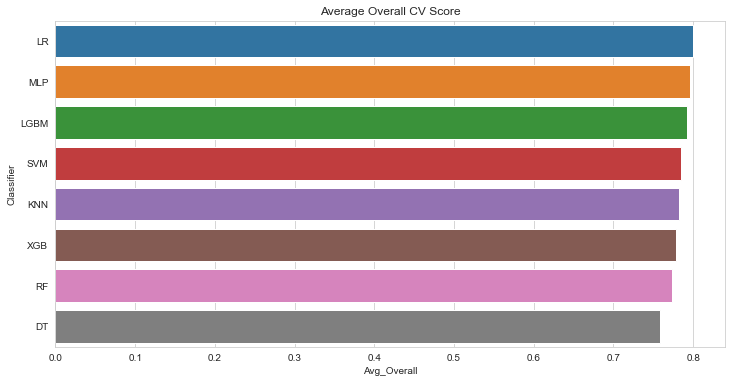

In [38]:
plt.figure(figsize=(12, 6))
sns.barplot(data=results, x="Avg_Overall", y="Classifier")
plt.title("Average Overall CV Score")
plt.show()

Похоже, логистическая регрессия — наша лучшая модель. Мы будем использовать этот алгоритм для прогнозирования тестовых данных. Но перед этим мы настроим гиперпараметры этого алгоритма с помощью кросс-валидации Grid Search.

### Подбор гиперпараметров

In [39]:
lr = LogisticRegression()
params = {
    "penalty": ("l1", "l2", "elasticnet"),
    "tol": (0.1, 0.01, 0.001, 0.0001),
    "C": (10.0, 1.0, 0.1, 0.01)
}
clf = GridSearchCV(lr, params, cv=10)
clf.fit(X_train_scaled, y_train)
print("Best hyperparameter:", clf.best_params_)

Best hyperparameter: {'C': 1.0, 'penalty': 'l2', 'tol': 0.1}


Train Accuracy: 0.8338945005611672
Train F1-Score: 0.7771084337349397


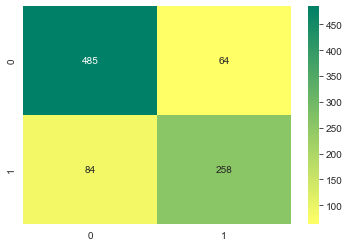

In [40]:
y_pred = clf.predict(X_train_scaled)
print(f"Train Accuracy: {accuracy_score(y_train, y_pred)}")
print(f"Train F1-Score: {f1_score(y_train, y_pred)}")
sns.heatmap(confusion_matrix(y_train, y_pred), fmt='.3g', annot=True, cmap='summer_r')
plt.show()

In [41]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       549
           1       0.80      0.75      0.78       342

    accuracy                           0.83       891
   macro avg       0.83      0.82      0.82       891
weighted avg       0.83      0.83      0.83       891



### Submit Test Prediction

In [42]:
y_pred = clf.predict(X_test_scaled)

submission = pd.read_csv("gender_submission.csv")
submission["Survived"] = y_pred
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
